In [21]:
import os
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from itertools import cycle
import torch 

import EWOthello.utils.plot_helpers as plt_utils
from EWOthello.mingpt.probe_model import BatteryProbeClassification
from EWOthello.data.othello import *
from EWOthello.mingpt.dataset import CharDataset 
from EWOthello.mingpt.model import GPT, GPTConfig, GPTforProbing, GPTforProbing_v2

In [32]:
datapath = "../EWOthello/ckpts/"
all_files = os.listdir(datapath)
GPT_Folders = [name for name in all_files if name.startswith("Dean_GPT_Synthetic")][0:1]
print(GPT_Folders)

['Dean_GPT_Synthetic_4L8H']


[0.021382718330023556, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,

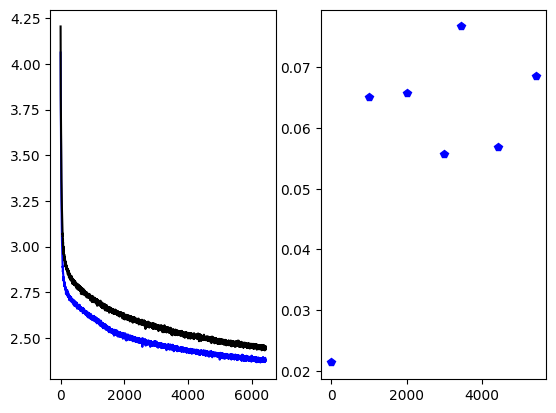

In [40]:
fig = plt.figure()
ax = plt_utils.addAxis(fig,1,2)

for fold in GPT_Folders:
    model_path = datapath + fold + "/"
    training_history_path = [name for name in os.listdir(model_path) if name.endswith(".pickle")][0]

    with open(model_path + training_history_path, 'rb') as fhandle:
        training_history = pickle.load(fhandle)
        training_loss = training_history["training_loss"]
        testing_loss = training_history["testing_loss"]
        val_legal_perc = training_history["val_legal_perc"]

        #ax[0].plot(training_loss)
        print(val_legal_perc)
        ax[0].plot(testing_loss, 'b-')
        ax[0].plot(training_loss, 'k-')
        ax[1].plot(val_legal_perc, 'bp')




